In [131]:
import nibabel as nib
import numpy as np
import pandas as pd
from nilearn import surface, plotting
from neuromaps import transforms
import brainspace
from nilearn import datasets

surface HCP: https://github.com/rmldj/hcp-utils/tree/master/hcp_utils/data
volumetric: /Users/h/Documents/MATLAB/spm12/canonical/cortex_5124.surf.gii 



In [ ]:
# extract gii from cifti
/Applications/workbench/bin_macosx64/wb_command -cifti-separate /Users/h/Documents/projects_local/sandbox/fmriprep_bold/surface/sub-0061_ses-01_task-social_acq-mb8_run-1_space-fsLR_den-91k_bold.dtseries.nii COLUMN -metric CORTEX_LEFT test_left.func.gii

In [ ]:
https://nbviewer.org/github/neurohackademy/nh2020-curriculum/blob/master/we-nibabel-markiewicz/NiBabel.ipynb
https://neurostars.org/t/how-to-read-a-cifti-file-header-with-nibabel/21341

function for getting cifti data

In [125]:
import nibabel as nb

def surf_data_from_cifti(data, axis, surf_name):
    assert isinstance(axis, nb.cifti2.BrainModelAxis)
    for name, data_indices, model in axis.iter_structures():  # Iterates over volumetric and surface structures
        if name == surf_name:                                 # Just looking for a surface
            data = data.T[data_indices]                       # Assume brainmodels axis is last, move it to front
            vtx_indices = model.vertex                        # Generally 1-N, except medial wall vertices
            surf_data = np.zeros((vtx_indices.max() + 1,) + data.shape[1:], dtype=data.dtype)
            surf_data[vtx_indices] = data
            return surf_data
    raise ValueError(f"No structure named {surf_name}")


In [150]:
for name, data_indices, model in axes[1].iter_structures():
    print(name)

CIFTI_STRUCTURE_CORTEX_LEFT
CIFTI_STRUCTURE_CORTEX_RIGHT
CIFTI_STRUCTURE_ACCUMBENS_LEFT
CIFTI_STRUCTURE_ACCUMBENS_RIGHT
CIFTI_STRUCTURE_AMYGDALA_LEFT
CIFTI_STRUCTURE_AMYGDALA_RIGHT
CIFTI_STRUCTURE_BRAIN_STEM
CIFTI_STRUCTURE_CAUDATE_LEFT
CIFTI_STRUCTURE_CAUDATE_RIGHT
CIFTI_STRUCTURE_CEREBELLUM_LEFT
CIFTI_STRUCTURE_CEREBELLUM_RIGHT
CIFTI_STRUCTURE_DIENCEPHALON_VENTRAL_LEFT
CIFTI_STRUCTURE_DIENCEPHALON_VENTRAL_RIGHT
CIFTI_STRUCTURE_HIPPOCAMPUS_LEFT
CIFTI_STRUCTURE_HIPPOCAMPUS_RIGHT
CIFTI_STRUCTURE_PALLIDUM_LEFT
CIFTI_STRUCTURE_PALLIDUM_RIGHT
CIFTI_STRUCTURE_PUTAMEN_LEFT
CIFTI_STRUCTURE_PUTAMEN_RIGHT
CIFTI_STRUCTURE_THALAMUS_LEFT
CIFTI_STRUCTURE_THALAMUS_RIGHT


In [138]:
# load template
l, r = brainspace.datasets.load_conte69()
l

<BSPolyData object at 0x16968c490 [Wrapping a vtkmodules.vtkCommonDataModel.vtkPolyData(0x10f4a9510]>

None
[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[<nibabel.cifti2.cifti2_axes.SeriesAxis object at 0x1692b07d0>, <nibabel.cifti2.cifti2_axes.BrainModelAxis object at 0x1692b1290>]


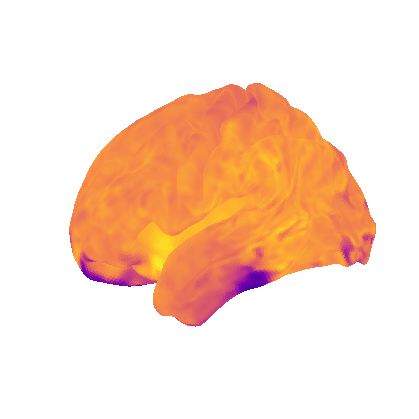

In [153]:
# extract cifti and plot
filename = '/Users/h/Documents/projects_local/sandbox/fmriprep_bold/surface/sub-0061_ses-01_task-social_acq-mb8_run-1_space-fsLR_den-91k_bold.dtseries.nii'
# for i, h in enumerate(['lh', 'rh']):

cifti = nib.load(filename)
cifti_data = cifti.get_fdata(dtype=np.float32)
cifti_hdr = cifti.header
nifti_hdr = cifti.nifti_header
bm0 = next(cifti_hdr.matrix[1].brain_models)
print(bm0.voxel_indices_ijk)
print(list(bm0.vertex_indices)[:20])
axes = [cifti_hdr.get_axis(i) for i in range(cifti.ndim)]
print(axes)
# conte = brainspace.datasets.load_conte69()
# fsaverage = datasets.fetch_surf_fsaverage()
conteL = '/Users/h/Dropbox (Dartmouth College)/projects_dropbox/BrainSpace/brainspace/datasets/surfaces/conte69_32k_lh.gii'
_ = plotting.plot_surf(conteL,
                  surf_data_from_cifti(cifti_data, axes[1], 'CIFTI_STRUCTURE_CORTEX_LEFT').mean(axis=1),
                  cmap='plasma')

In [210]:
surf_data_from_cifti

<function __main__.surf_data_from_cifti(data, axis, surf_name)>

In [157]:
timeseries

array([[4075.09946987, 4162.01477095, 4123.87123529, ..., 4072.02909239,
        4057.26766217, 4114.89628572],
       [3629.42236893, 3629.0680946 , 3587.61799857, ..., 3628.71382028,
        3632.37465497, 3661.89751539],
       [3785.53925484, 3780.22513997, 3794.04183865, ..., 3687.4052668 ,
        3697.79731367, 3685.9881695 ],
       ...,
       [4663.66721526, 5124.57811218, 5027.15267278, ..., 4844.2290296 ,
        4911.0687856 , 4536.83700688],
       [4515.58054738, 4654.10180848, 4555.37736323, ..., 4745.74076723,
        4626.58650257, 4710.78570049],
       [3133.91067959, 3427.84027796, 3364.42517377, ..., 3226.61246132,
        3090.92539482, 3477.91104924]])

In [219]:

cifti = nib.load(filename)

downsample

In [183]:
resample_L = nib.cifti2.cifti2.Cifti2Surface(
    brain_structure=surf_data_from_cifti(cifti_data, axes[1], 'CIFTI_STRUCTURE_CORTEX_LEFT'), 
                                    surface_number_of_vertices=10242)
resample_R = nib.cifti2.cifti2.Cifti2Surface(
    brain_structure=surf_data_from_cifti(cifti_data, axes[1], 'CIFTI_STRUCTURE_CORTEX_RIGHT'), 
                                    surface_number_of_vertices=10242)
timeseries = np.concatenate((resample_L, resample_R))


In [185]:
resample_R.surface_number_of_vertices

10242

In [165]:
timeseriesL = surf_data_from_cifti(cifti_data, axes[1], 'CIFTI_STRUCTURE_CORTEX_LEFT')
timeseriesR = surf_data_from_cifti(cifti_data, axes[1], 'CIFTI_STRUCTURE_CORTEX_RIGHT')
timeseries = np.concatenate((timeseriesL, timeseriesR))

In [166]:
timeseries.shape

(64984, 872)

## clean time series

In [ ]:
confoundstsv = '/Users/h/Documents/projects_local/sandbox/fmriprep_bold/surface/sub-0061_ses-01_task-social_acq-mb8_run-1_desc-confounds_timeseries.tsv'
confounds = pd.read_csv(confoundstsv, sep='\t')
confounds_subset = confounds[['csf', 'trans_x', 'trans_x_derivative1', 'trans_x_power2', 'trans_x_derivative1_power2',
                         'trans_y', 'trans_y_derivative1', 'trans_y_derivative1_power2', 'trans_y_power2',
                         'trans_z', 'trans_z_derivative1', 'trans_z_derivative1_power2', 'trans_z_power2',
                         'rot_x', 'rot_x_derivative1', 'rot_x_derivative1_power2', 'rot_x_power2',
                         'rot_y', 'rot_y_derivative1', 'rot_y_derivative1_power2', 'rot_y_power2',
                         'rot_z', 'rot_z_derivative1', 'rot_z_derivative1_power2', 'rot_z_power2']]
mean_values = np.nanmean(confounds_subset, axis=0)  # Compute the column-wise mean ignoring NaNs
clean_data = np.where(np.isnan(confounds_subset), mean_values, confounds_subset) 

In [ ]:
# resample
from neuromaps.resampling import resample_images
neurosynth = fetch_annotation(source='neurosynth')
ns_res, aba_res = resample_images(src=neurosynth, trg=abagen,
                                  src_space='MNI152', trg_space='fsaverage',
                                  method='linear', resampling='downsample_only')

## confound regression


In [167]:
from nilearn import signal
clean_ts = signal.clean(timeseries.T, confounds=clean_data).T

/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_13848/3109274144.py:2: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  clean_ts = signal.clean(timeseries.T, confounds=clean_data).T


In [169]:
clean_ts.shape

(64984, 872)

# different dataset

In [302]:
from brainspace.datasets import load_group_fc, load_parcellation, load_conte69

# First load mean connectivity matrix and Schaefer parcellation
conn_matrix = load_group_fc('schaefer', scale=400)
labeling = load_parcellation('schaefer', scale=400, join=True)

# and load the conte69 surfaces
surf_lh, surf_rh = load_conte69()
from brainspace.plotting import plot_hemispheres

plot_hemispheres(surf_lh, surf_rh, array_name=labeling, size=(1200, 200),
                 cmap='tab20', zoom=1.85)

In [ ]:
labeling

# archive

In [257]:
lh_labels, lh_ctab, lh_names= nib.freesurfer.io.read_annot('/Users/h/Documents/projects_local/life-encoding/scripts/HCP-MMP/lh.HCP_MMP1.fsaverage6.annot')
rh_labels, rh_ctab, rh_names= nib.freesurfer.io.read_annot('/Users/h/Documents/projects_local/life-encoding/scripts/HCP-MMP/rh.HCP_MMP1.fsaverage6.annot')


In [263]:
import nibabel as nib
def read_gifti(gifti_fn):
    gii = nib.load(gifti_fn)
    data = np.vstack([da.data[np.newaxis, :]
                      for da in gii.darrays]) 
    return data


# Load surface file
surface_file = '/Users/h/Documents/projects_local/sandbox/fmriprep_bold/surface/output.func.gii'
surface_data = read_gifti(surface_file)




In [266]:
surface_data[0].shape

(91282, 872)

In [273]:
original_coords = np.mgrid[:original_coords.shape[0]]

In [276]:
timeseriesL.shape

(32492, 872)

In [286]:
original_coords.shape

(32492,)

In [291]:
original_coords

array([    0,     1,     2, ..., 32489, 32490, 32491])

In [294]:
new_coords

array([    0,     1,     2, ..., 10239, 10240, 10241])

In [292]:
new_coords = np.mgrid[:10242]

In [288]:
timeseriesL.shape

(32492, 872)

In [300]:
atlas['map_left'].shape

(10242,)

In [299]:
original_coords = np.mgrid[:timeseriesL.shape[0]]#atlas['map_left']

new_coords = np.mgrid[:10242]
# atlas_upsamp = griddata(timeseriesL, original_coords, (10242,872), method='nearest')
atlas_upsamp = griddata(timeseriesL, original_coords, atlas['map_left'], method='nearest')
atlas_upsamp.shape

ValueError: cannot reshape array of size 10242 into shape (872)

In [202]:
import numpy as np
from nilearn import datasets
from brainspace.utils.parcellation import reduce_by_labels

# Fetch surface atlas
atlas = datasets.fetch_atlas_surf_destrieux()
from scipy.interpolate import griddata
###############
# Define the desired new shape
new_shape = (64984,)

# Generate coordinates for the original and new shapes
original_coords = np.mgrid[:original_coords.shape[0]]#atlas['map_left']
new_coords = np.mgrid[:new_shape[0]]

# Perform interpolation to upsample the atlas data
atlas_upsamp = griddata(original_coords, atlas['map_left'], new_coords, method='nearest')
##############

# Remove non-cortex regions
regions = atlas['labels'].copy()
masked_regions = [b'Medial_wall', b'Unknown']
masked_labels = [regions.index(r) for r in masked_regions]
for r in masked_regions:
    regions.remove(r)

# Build Destrieux parcellation and mask
labeling = np.concatenate([atlas['map_left'], atlas['map_right']])
mask = ~np.isin(labeling, masked_labels)

# Distinct labels for left and right hemispheres
lab_lh = atlas['map_left']
labeling[lab_lh.size:] += lab_lh.max() + 1




# extract mean timeseries for each label
seed_ts = reduce_by_labels(clean_ts[mask], labeling[mask], axis=1, red_op='mean')


IndexError: boolean index did not match indexed array along dimension 0; dimension is 64984 but corresponding boolean dimension is 20484

In [269]:
labeling.shape

(20484,)

In [209]:
labeling.shape

(20484,)

Import the dataset as timeseries

In [ ]:
# import nibabel as nib
# import numpy as np

# filename = #'filename.{}.mgz' # where {} will be replaced with 'lh' and 'rh'
# timeseries = [None] * 2
# for i, h in enumerate(['lh', 'rh']):
#     timeseries[i] = nib.load(filename.format(h)).get_fdata().squeeze()
# timeseries = np.vstack(timeseries)

In [66]:
filename = '/Users/h/Documents/projects_local/sandbox/fmriprep_bold/surface/sub-0061_ses-01_task-social_acq-mb8_run-1_space-fsLR_den-91k_bold.dtseries.nii'
# for i, h in enumerate(['lh', 'rh']):
surface_data = nib.load(filename)
# surface_data = cifti_data.get_arrays_from_intent('NIFTI_INTENT_SURFACE')
# vertices = surface_data[0].data
# faces = surface_data[1].data
timeseries = surface_data.get_fdata().squeeze().T
# timeseries = np.vstack(timeseries)

In [118]:
# import nibabel as nib
# import matplotlib.pyplot as plt

# # Assuming 'cifti_file' is the path to the CIFTI file

# # Load the CIFTI data
# cifti_data = nib.load(filename)

# # Extract the CIFTI data array
# surface_data = cifti_data.get_fdata()
# header = cifti_data.header
# surface_information = header.get_index_map(1).surface
# vertices = surface_information.vertex_indices
# faces = surface_information.face_indices
# # plotting.plot_surf()

AttributeError: 'Cifti2MatrixIndicesMap' object has no attribute 'surface'

In [10]:
timeseries.shape

(91282, 872)

In [53]:
confoundstsv = '/Users/h/Documents/projects_local/sandbox/fmriprep_bold/surface/sub-0061_ses-01_task-social_acq-mb8_run-1_desc-confounds_timeseries.tsv'
confounds = pd.read_csv(confoundstsv, sep='\t')
confounds_subset = confounds[['csf', 'trans_x', 'trans_x_derivative1', 'trans_x_power2', 'trans_x_derivative1_power2',
                         'trans_y', 'trans_y_derivative1', 'trans_y_derivative1_power2', 'trans_y_power2',
                         'trans_z', 'trans_z_derivative1', 'trans_z_derivative1_power2', 'trans_z_power2',
                         'rot_x', 'rot_x_derivative1', 'rot_x_derivative1_power2', 'rot_x_power2',
                         'rot_y', 'rot_y_derivative1', 'rot_y_derivative1_power2', 'rot_y_power2',
                         'rot_z', 'rot_z_derivative1', 'rot_z_derivative1_power2', 'rot_z_power2']]
mean_values = np.nanmean(confounds_subset, axis=0)  # Compute the column-wise mean ignoring NaNs
clean_data = np.where(np.isnan(confounds_subset), mean_values, confounds_subset) 

In [49]:
clean_data.shape

(872, 25)

In [50]:
timeseries.shape

(91282, 872)

In [52]:
from nilearn import signal
clean_ts = signal.clean(timeseries.T, confounds=clean_data).T

/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_13848/3109274144.py:2: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  clean_ts = signal.clean(timeseries.T, confounds=clean_data).T


In [21]:
# from brainspace.datasets import fetch_timeseries_preprocessing
# timeseries = fetch_timeseries_preprocessing()

# from brainspace.datasets import load_confounds_preprocessing
# confounds_out = load_confounds_preprocessing()

# print(timeseries.shape)
# print(confounds_out.shape)


(20484, 652)
(652, 29)


In [56]:
timeseries.shape

(91282, 872)

In [59]:
half = timeseries.shape[0] // 2
image_left = timeseries[:half, :]
image_right = timeseries[half:, :]

In [60]:
image_left

array([[4075.09946987, 4162.01477095, 4123.87123529, ..., 4072.02909239,
        4057.26766217, 4114.89628572],
       [3629.42236893, 3629.0680946 , 3587.61799857, ..., 3628.71382028,
        3632.37465497, 3661.89751539],
       [3785.53925484, 3780.22513997, 3794.04183865, ..., 3687.4052668 ,
        3697.79731367, 3685.9881695 ],
       ...,
       [3805.26052561, 3766.40844129, 3780.10704853, ..., 3746.3328962 ,
        3743.73488449, 3754.36311424],
       [3786.36589494, 3741.96351286, 3756.13448586, ..., 3729.56391148,
        3727.20208265, 3749.52136513],
       [3817.18776122, 3753.18219982, 3778.68995123, ..., 3764.87325255,
        3772.31301337, 3775.38339086]])